# Import necessary libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from scipy import stats
import pickle
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [3]:
# Load dataset
data = pd.read_csv(r'first inten project.csv')

In [4]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
len(data)

36285

In [6]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [7]:
# suumery statistics 
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
data.shape

(36285, 17)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

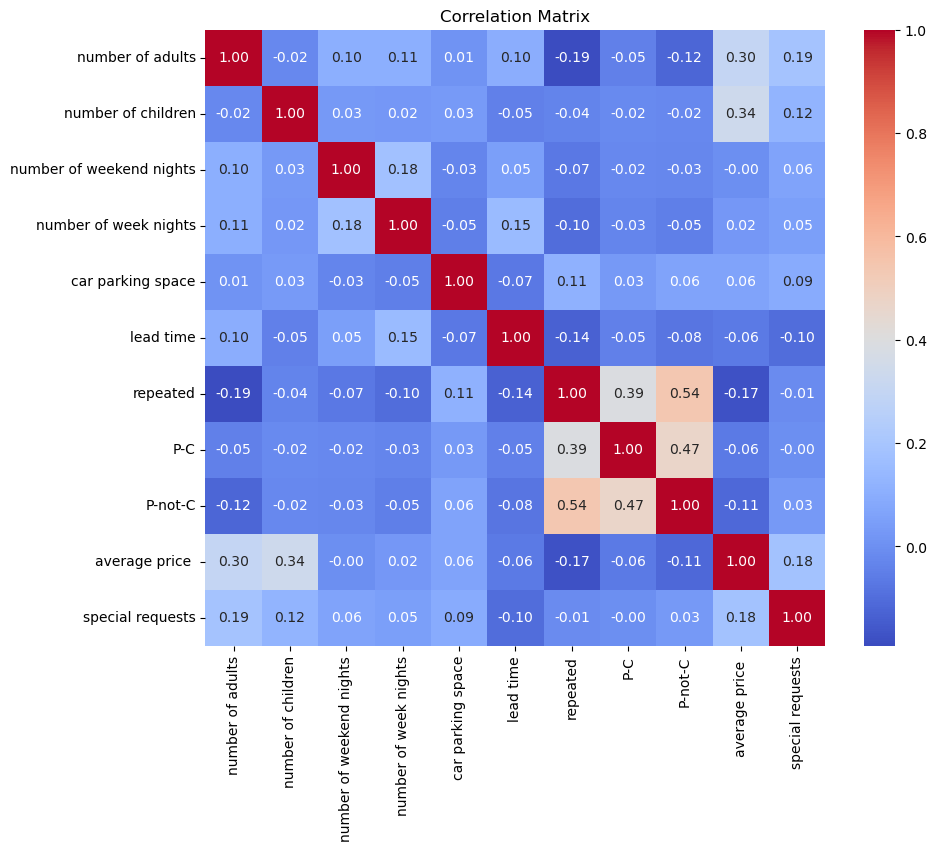

In [10]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# 1. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

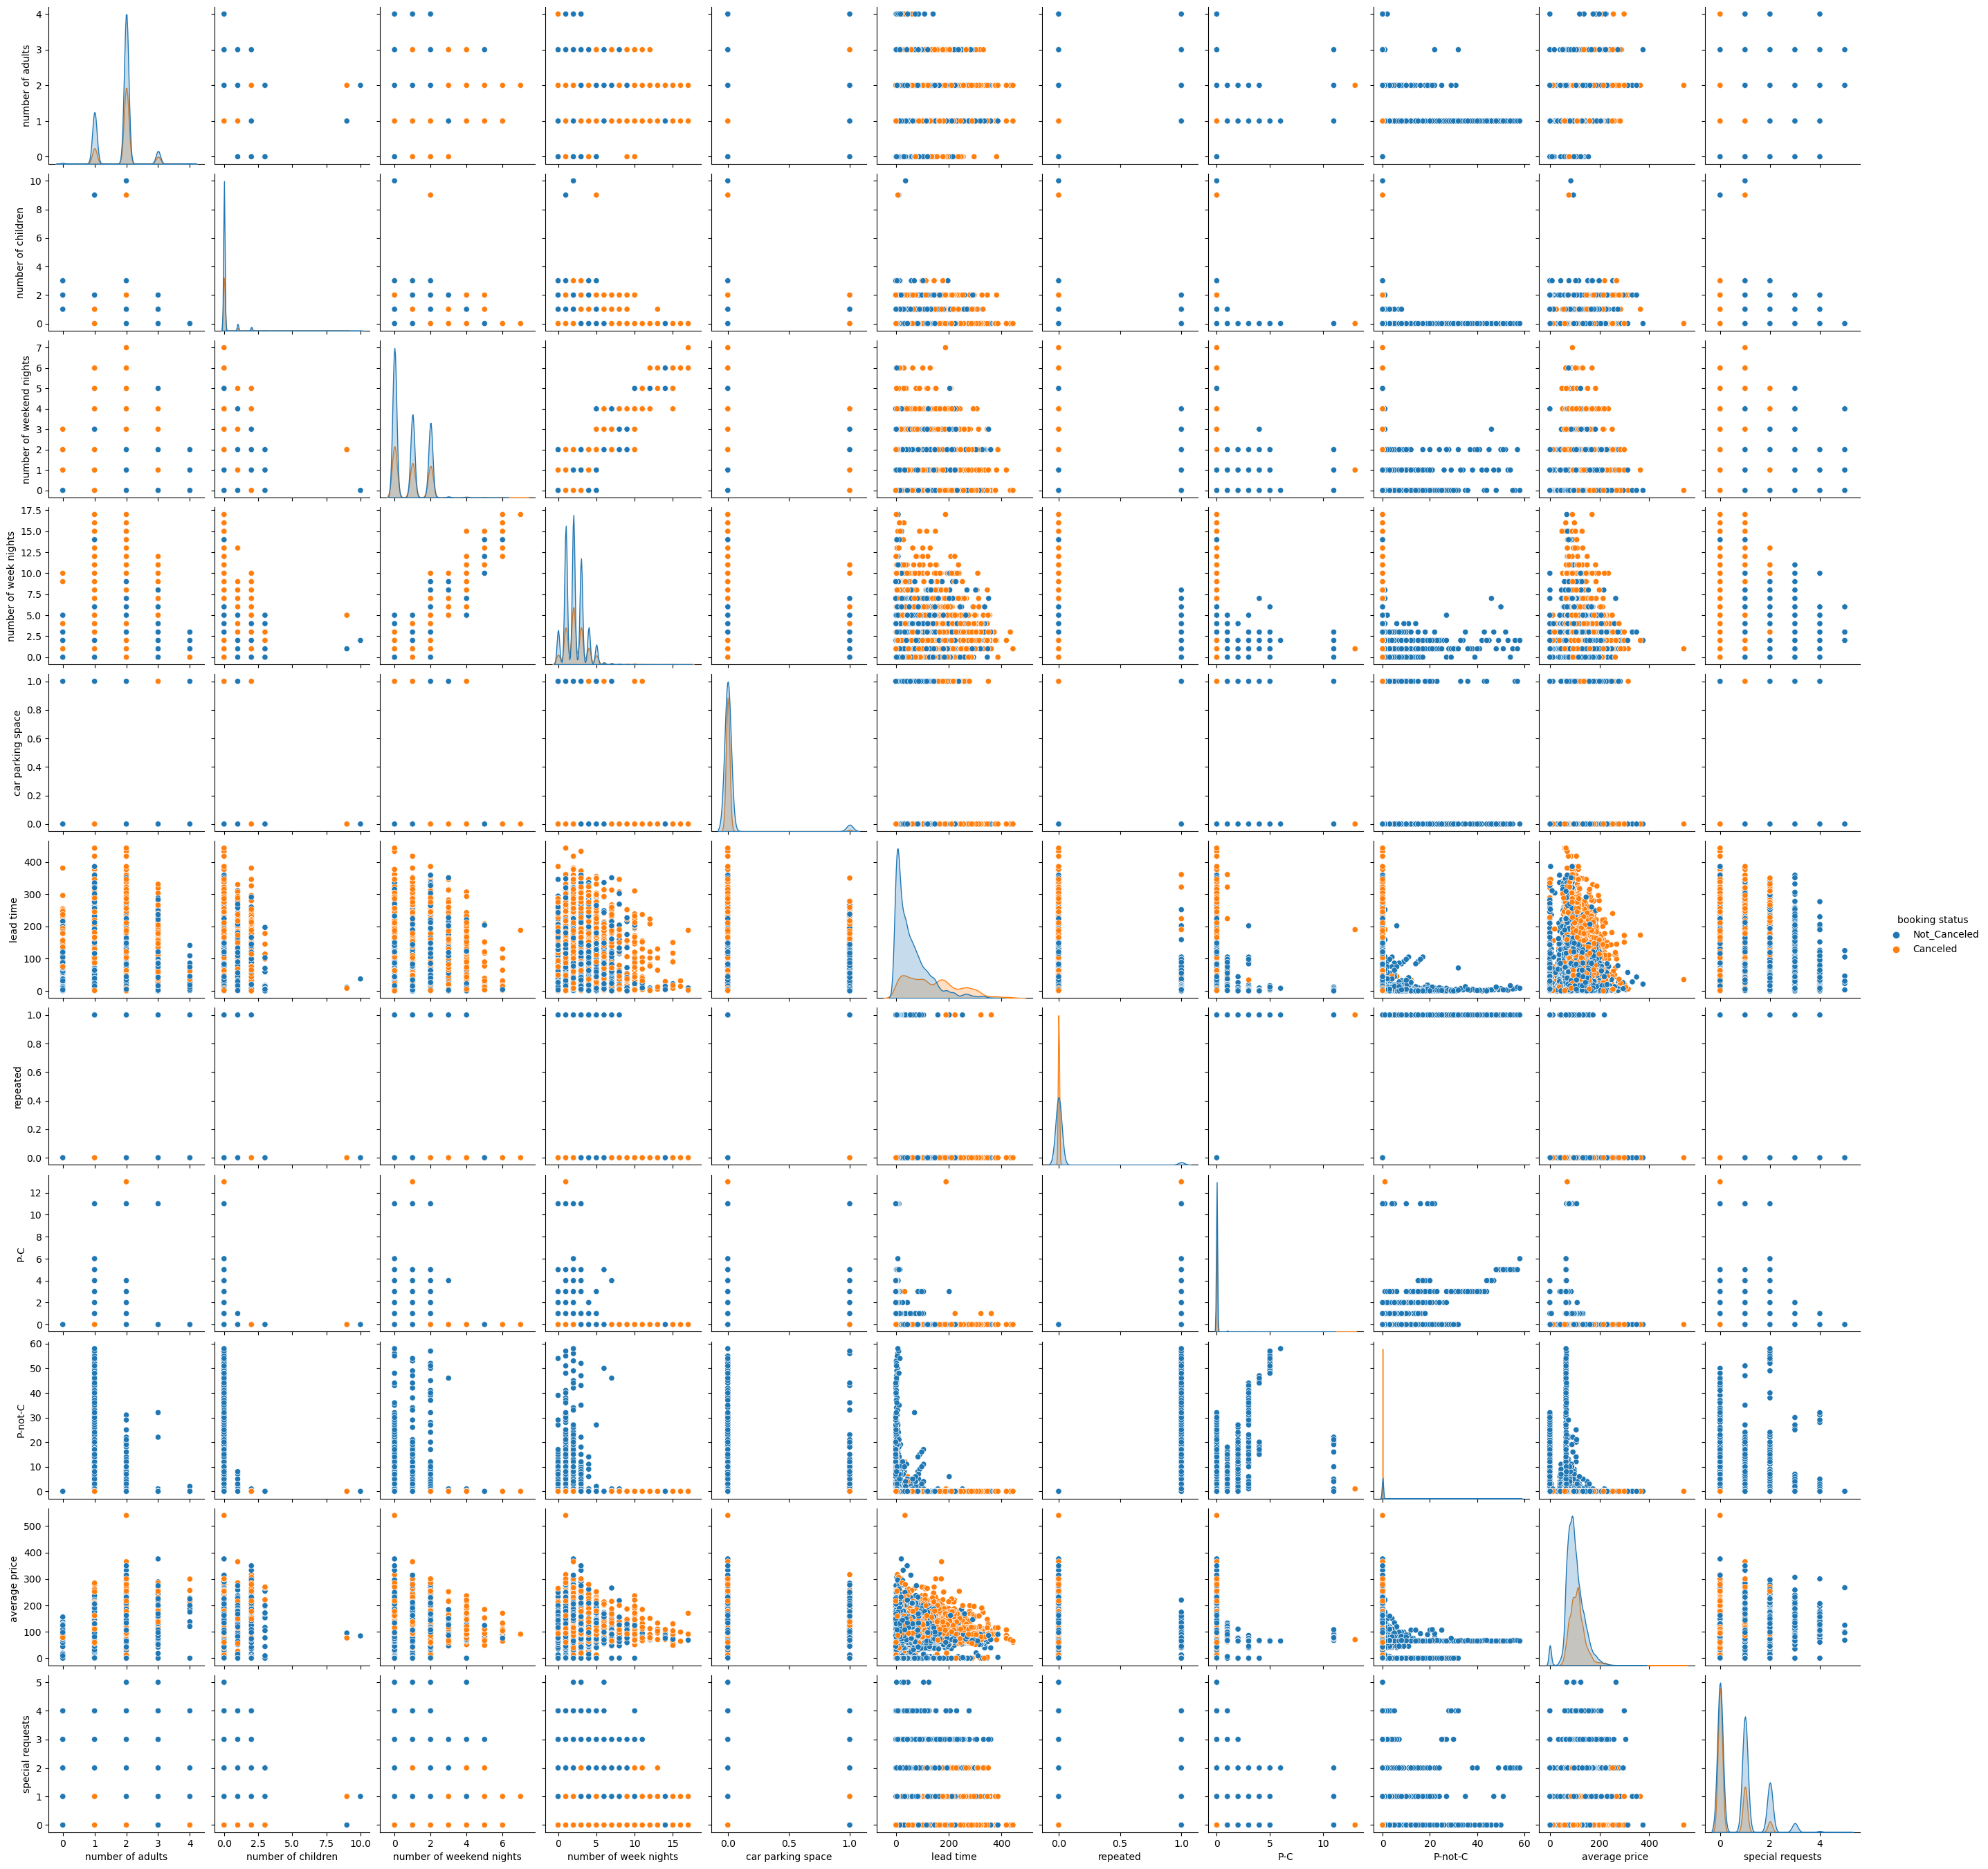

In [11]:
# 2. Pairplot to visualize feature distribution
sns.pairplot(data, hue='booking status')
plt.show()

# Data Preprocessing

In [12]:
# Check for null values 
print("Null values:\n", data.isnull().sum())

Null values:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [13]:
print("Duplicated values: \n",data.duplicated().sum())

Duplicated values: 
 0


In [14]:
# Check for data types
print("Data types:\n", data.dtypes)

Data types:
 Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [15]:
# Remove any leading/trailing whitespace in column names and string data
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [16]:
# Handle missing values by filling with median (numeric) or mode (categorical)
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [17]:
# Drop irrelevant columns
data = data.drop(columns=['Booking_ID', 'date of reservation'])

In [18]:
# Drop rows with missing target variable 'booking status'
data = data.dropna(subset=['booking status'])

In [19]:
# Handle missing values separately for numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill numeric columns with median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill categorical columns with mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [20]:
# One-Hot Encoding for categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')
categorical_cols = ['type of meal', 'room type', 'market segment type']
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_data], axis=1)

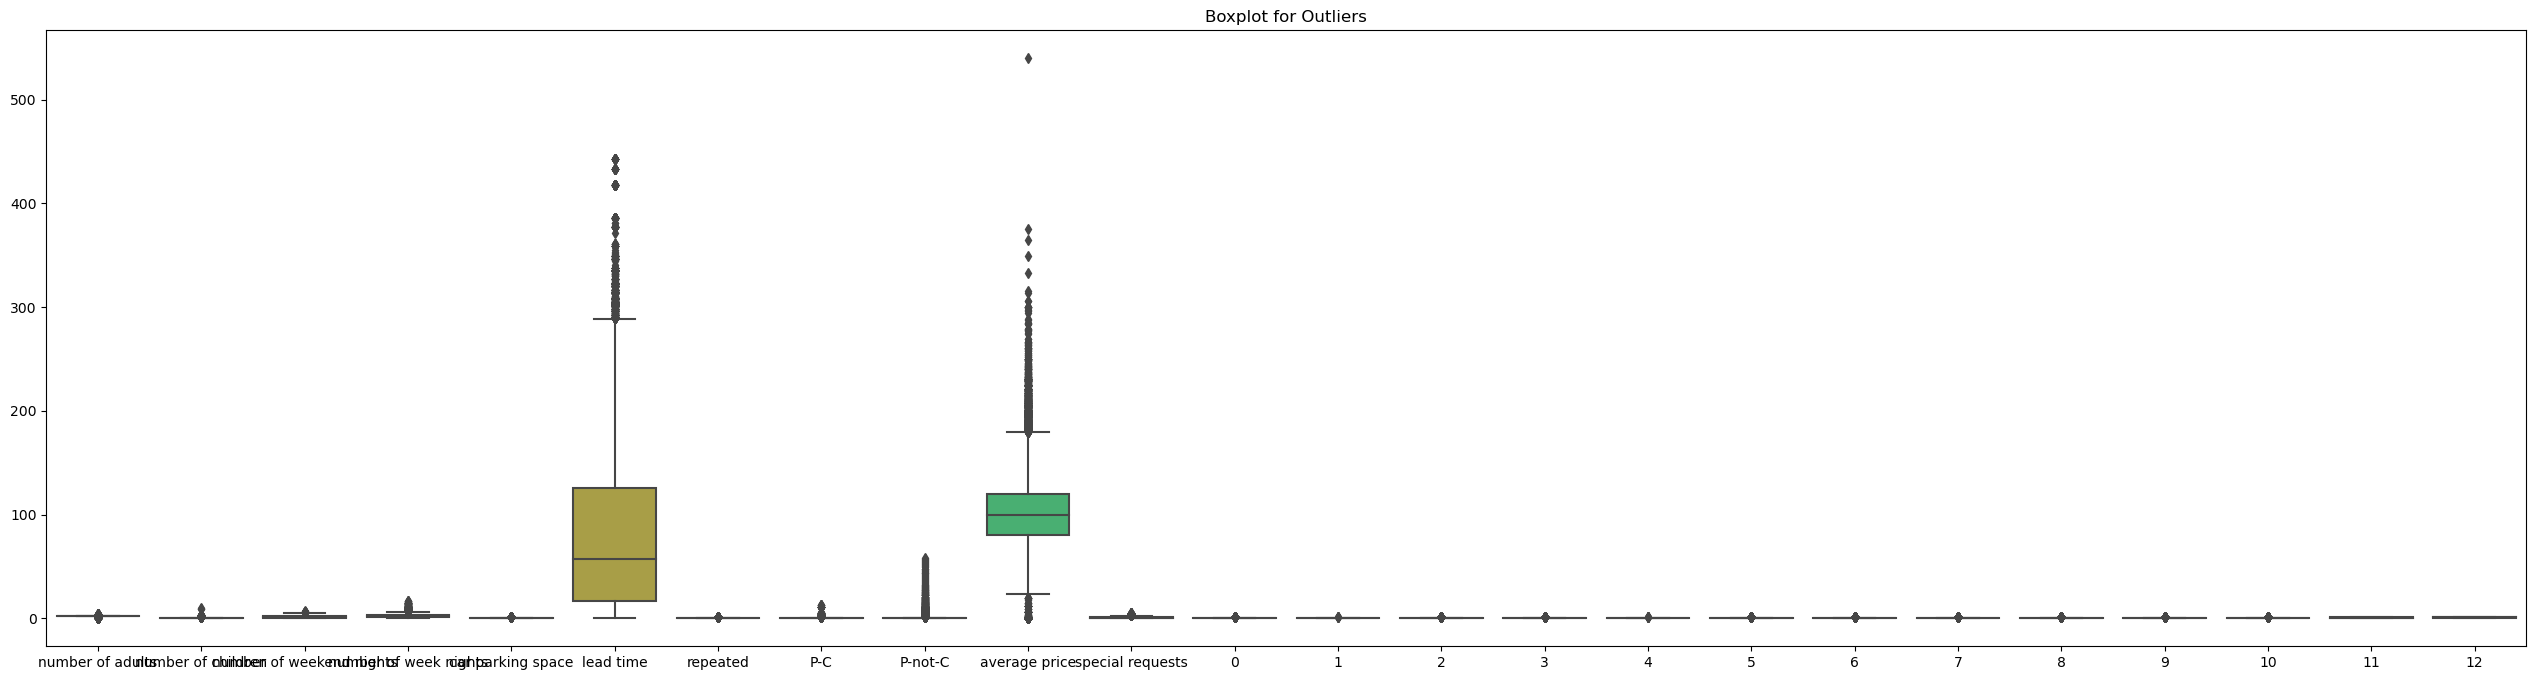

In [21]:
# Boxplot for numeric columns to check for outliers
plt.figure(figsize=(32, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot for Outliers')
plt.show()

In [22]:
# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
data = data[(z_scores < 3).all(axis=1)]

In [23]:
# Check if X and y have valid data
#print(f"X shape: {X.shape}, y shape: {y.shape}")

In [24]:
# Split data into features and target
X = data.drop(columns=['booking status'])
y = data['booking status']

In [25]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Ensure all feature names (column names) are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Standardization of numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection to Optimize Accuracy

In [54]:
# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=8)  # Select the top 8 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [55]:
# Get the selected feature names
selected_features = X.columns[selector.get_support()]

In [56]:
# Display the top 8 selected features
print("Top 8 selected features for training:")
print(selected_features.tolist())

Top 8 selected features for training:
['number of adults', 'number of weekend nights', 'number of week nights', 'lead time', 'average price', 'special requests', 11, 12]


# Hyperparameter Tuning for Random Forest & Decision Tree

In [42]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
params_dt = {"max_depth": np.arange(0, 30, 5), "criterion": ["gini", "entropy"]}
grid_search_dt = GridSearchCV(dt, param_grid=params_dt, cv=5)
grid_search_dt.fit(X_train_selected, y_train)

print(f"Best Parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best Score for Decision Tree: {grid_search_dt.best_score_}")

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15}
Best Score for Decision Tree: 0.8459093034128097


In [43]:
best_dt = grid_search_dt.best_estimator_

In [44]:
# Predictions for Decision Tree
y_pred_dt = best_dt.predict(X_test_selected)

In [45]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("---------------------------------------------------------")
print(f"Confusion Matrix for Decision Tree:\n{confusion_matrix(y_test, y_pred_dt)}")

Decision Tree Accuracy: 0.85
---------------------------------------------------------
Confusion Matrix for Decision Tree:
[[1455  413]
 [ 397 3083]]


Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Canceled       0.79      0.78      0.78      1868
Not_Canceled       0.88      0.89      0.88      3480

    accuracy                           0.85      5348
   macro avg       0.83      0.83      0.83      5348
weighted avg       0.85      0.85      0.85      5348

---------------------------------------------------------


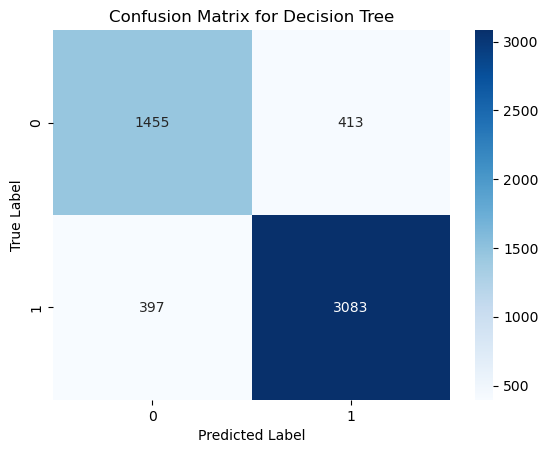

In [46]:
print(f"Classification Report for Decision Tree:\n{classification_report(y_test, y_pred_dt)}")
print("---------------------------------------------------------")

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
# Random Forest Classifier
rf = RandomForestClassifier()
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_search_rf.fit(X_train_selected, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [48]:
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Score for Random Forest: {grid_search_rf.best_score_}")

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Best Score for Random Forest: 0.8676484338475923


In [49]:
best_rf = grid_search_rf.best_estimator_

In [50]:
# Predictions for Random Forest
y_pred_rf = best_rf.predict(X_test_selected)

In [51]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("---------------------------------------------------------")
print(f"Confusion Matrix for Random Forest:\n{confusion_matrix(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.87
---------------------------------------------------------
Confusion Matrix for Random Forest:
[[1431  437]
 [ 261 3219]]


Classification Report for Random Forest:
              precision    recall  f1-score   support

    Canceled       0.85      0.77      0.80      1868
Not_Canceled       0.88      0.93      0.90      3480

    accuracy                           0.87      5348
   macro avg       0.86      0.85      0.85      5348
weighted avg       0.87      0.87      0.87      5348

---------------------------------------------------------


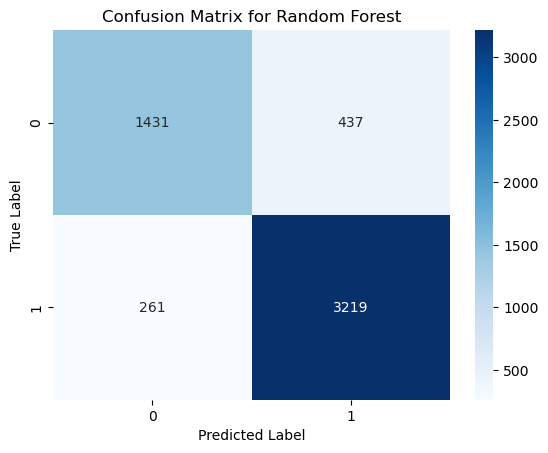

In [52]:
print(f"Classification Report for Random Forest:\n{classification_report(y_test, y_pred_rf)}")
print("---------------------------------------------------------")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues", fmt=".0f")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
# Save the models
with open('best_dt_model.pkl', 'wb') as file:
    pickle.dump(best_dt, file)

with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)